In [65]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [66]:
data = datasets.fetch_california_housing(as_frame=True).frame
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [67]:
print(data.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [68]:
data.shape

(20640, 9)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Таким образом, дата фрейм не имеет пропусков

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

In [70]:
def getMetrics(X, y, random_seed=42, model=None, test_size=0.2):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    print(rmse_train, r2_train, rmse_test, r2_test)

def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass

In [71]:
X = data.loc[:, data.columns != "MedHouseVal"]
y = data[["MedHouseVal"]]
getMetrics(X, y)


0.7196757085831575 0.6125511913966952 0.7455813830127763 0.575787706032451


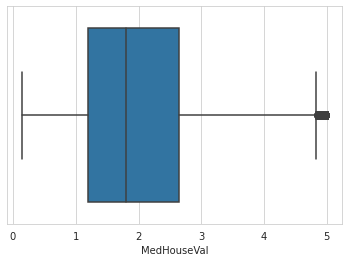

In [73]:
get_boxplot(data, ["MedHouseVal"])

In [79]:
data[data["MedHouseVal"]>4.8]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


То есть мы видим, что из 20640 строк 1079 строк - это выбросы

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
7. Сделайте выводы.
8. Удалите признаки на основании полученных значений, выводов.
Повторите п. 3, п. 4 на измененных данных.

<AxesSubplot:>

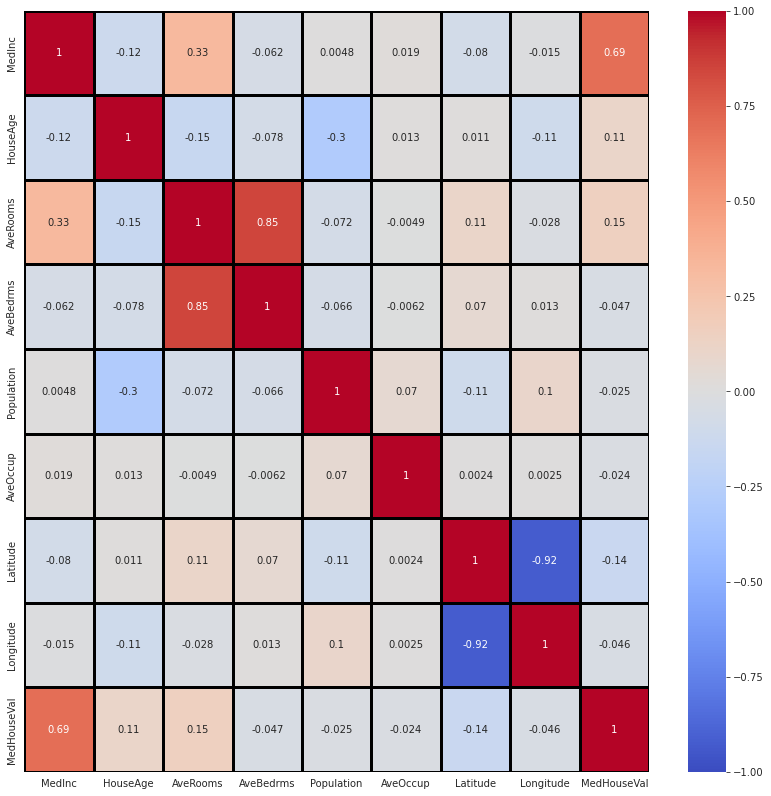

In [87]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=3,linecolor='black', ax=ax)

Мы видим довольно сильную корреляцию 0.85 между признаками AveRooms и AveBedrms. Мы можем попробовать удалить один из этих признаков, например, второй.

In [94]:
X2 = data.loc[:, (data.columns != "MedHouseVal")&(data.columns != "AveBedrms")]
y2 = data[["MedHouseVal"]]
getMetrics(X2, y2)

0.7316746485880744 0.5995238502055928 0.7398151789804083 0.5823239094526445


Вывод - можно видеть, что удаление из датафрейма сильно коррелированных признаков заметно не ухудшает метрики качества RMSE и R2, можно это делать без опасений за качество модели

9. Исследуйте оставленные признаки на выбросы.
Удалите выбросы в случае обнаружения.
Повторите п. 3, п. 4 на измененных данных.

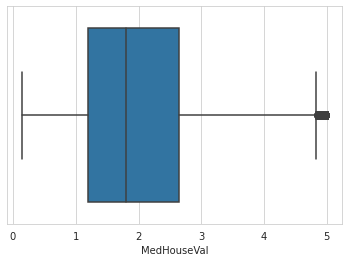

In [98]:
new_data = data.loc[:, data.columns != "AveBedrms"]
get_boxplot(new_data, ["MedHouseVal"])

Ничего особенно не изменилось, все равно есть выбросы с MedHouseVal>4.8 (приблизительно)

In [112]:
new_data = new_data[new_data.MedHouseVal < 4.8]
X3 = new_data.loc[:, (new_data.columns != "MedHouseVal")&(new_data.columns != "AveBedrms")]
y3 = new_data[["MedHouseVal"]]
getMetrics(X3, y3)

0.6287729767152344 0.5613063197672399 0.6453735362820614 0.5539677335460961


В этом случае мы видим, что качество модели заметно ухудшилось, следовательно, можно сделать вывод, что удаленные значения на самом деле не были подлинными выбросами, а вписывались в модель, как какие-то крайние случаи.

10. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
Повторите п. 3, п. 4 на измененных данных.

In [113]:
data['Population'] = np.log(data['Population'])
data['AveOccup'] = np.sqrt(data['AveOccup'])
data['HouseAge'] = np.power(data['HouseAge'], 2)

In [114]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,1681.0,6.984127,1.023810,5.774552,1.598611,37.88,-122.23,4.526
1,8.3014,441.0,6.238137,0.971880,7.783641,1.452529,37.86,-122.22,3.585
2,7.2574,2704.0,8.288136,1.073446,6.206576,1.673995,37.85,-122.24,3.521
3,5.6431,2704.0,5.817352,1.073059,6.324359,1.596228,37.85,-122.25,3.413
4,3.8462,2704.0,6.281853,1.081081,6.336826,1.476979,37.85,-122.25,3.422


In [115]:
X4 = data.loc[:, data.columns != "MedHouseVal"]
y4 = data[["MedHouseVal"]]
getMetrics(X4, y4)

0.7053299480109281 0.6278437730555526 0.7244889122810789 0.5994501008968756


11. Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными.
Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Общий вывод - преобразование данных может как ухудшить, так и улучшить качество модели, необходимо пробовать и варьировать преобразования, чтобы добиться лучшего результата. В работе производилось удаление сильно коррелированных признаков на основе корреляционных матриц, удаление выбросов (предполагаемых), математическое преобразование данных. В принципе, модели работают, но как я уже сказал, нужно подбирать параметры моделей для лучшего результата